<a href="https://colab.research.google.com/github/garcarlos91/TFM/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import glob
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Preparación de los datos.

#### En este apartado vamos a proceder limpiar y transformar datos, lo que implica reformatear, hacer correciones de datos y combinar conjuntos para enriquecerlos.

## Dataframe para calcular el consumo per cápita de energía electrica de cada provincia en España.

Vamos a crear un dataframe con valores por provincia. 

Para ello, hemos tratado y utilizado los siguientes datasets:


1.   Climatología.
1.   Población.
2.   Número de viviendas.
2.   PIB per cápita.
1.   Consumo de energía eléctrica per cápita (KWh).
1.   Consumo total de energía electrica (KWh) por provincia.








### Dataframe sobre la climatología de España por provincias (Climatology_df)

Vamos a calcular las temperaturas medias, máximas y mínimas, así como la media de las horas de luz y el total de precipitaciones en un año por provincias.

-Fecha.

-Hora.

-Provincia.

-Precipitación total (mm = l/m2).

-Horas de sol medias (horas).

-TMáx (ºC).

-TMedia (ºC).

-TMín (ºC).


### Climatología

Precipitaciones = 'Ip' ----> precipitaciones menores a 0.1mm

### IMPORTANTE: Vamos a proceder a juntar 52 excel con los datos meteorológicos de todas las provincias de la carpeta '*Estaciones por provincias*'. Para ello primero cargaremos estos archivos, y más adelante, se le indicará cuando, los restantes.

In [ ]:
# Como estoy trabajado con Google Colab, necesito subir el archivo para poder cargarlo.
# Vamos a cargar los excel climatológicos. Estos se encuentran en la carpeta 'Estaciones por provincias'.

uploaded_cl = files.upload()

Saving 0016A-19450201-20211102.csv to 0016A-19450201-20211102.csv
Saving 0201D-19940420-20211102.csv to 0201D-19940420-20211102.csv
Saving 0367-19730101-20211102.csv to 0367-19730101-20211102.csv
Saving 1024E-19280101-20211102.csv to 1024E-19280101-20211102.csv
Saving 1082-19470301-20211102.csv to 1082-19470301-20211102.csv
Saving 1111-19460601-20211102.csv to 1111-19460601-20211102.csv
Saving 1207U-19790101-20211102.csv to 1207U-19790101-20211102.csv
Saving 1428-19431101-20211102.csv to 1428-19431101-20211102.csv
Saving 1495-19560501-20211102.csv to 1495-19560501-20211102.csv
Saving 1505-19510101-20211102.csv to 1505-19510101-20211102.csv
Saving 1690A-19720801-20211102.csv to 1690A-19720801-20211102.csv
Saving 2030-19431101-20211102.csv to 2030-19431101-20211102.csv
Saving 2331-19430801-20211102.csv to 2331-19430801-20211102.csv
Saving 2374X-19881203-20211102.csv to 2374X-19881203-20211102.csv
Saving 2444-19830101-20211102.csv to 2444-19830101-20211102.csv
Saving 2465-19881001-2021110

In [ ]:
# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob.
csv_files = glob.glob('*.csv')
# Mostrar el archivo csv_files, el cual es una lista de nombres.
print(csv_files)

['2661-19380101-20211102.csv', '1111-19460601-20211102.csv', '8025-19380901-20211102.csv', '2465-19881001-20211102.csv', '2331-19430801-20211102.csv', '9091O-19760101-20211102.csv', '7228-19400101-20211102.csv', '5530E-19720701-20211102.csv', '8368U-19860401-20211102.csv', '9434-19410101-20211102.csv', '5402-19590401-20211102.csv', '1082-19470301-20211102.csv', '1505-19510101-20211102.csv', '2867-19450101-20211102.csv', '3195-19200101-20211102.csv', '2539-19361101-20211102.csv', '8178D-19830101-20211102.csv', '9262-19530901-20211031.csv', '9170-19481101-20211102.csv', '6325O-19680101-20211102.csv', '0016A-19450201-20211102.csv', '2614-19200201-20211102.csv', '0367-19730101-20211102.csv', '3469A-19821201-20211102.csv', '1207U-19790101-20211102.csv', '3365A-19200101-20211102.csv', '4121-19701101-20211102.csv', '3013-19490901-20211102.csv', '9771C-19830201-20211102.csv', '6155A-19420501-20211102.csv', '1690A-19720801-20211102.csv', '2444-19830101-20211102.csv', '2030-19431101-20211102.csv

In [ ]:
#Compruevo que haya 52 archivos (50 provincias + 2 Ciudades autónomas).
len(csv_files)

52

In [ ]:
list_data = []
Usecols = ['FECHA', 'PROVINCIA', 'TMEDIA','TMIN', 'TMAX', 'PRECIPITACION', 'SOL'] 

# Escribimos un Bucle que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes.
for filename in csv_files:
    data = pd.read_csv(filename, encoding= 'Latin-1', sep= ';', usecols= Usecols)
    list_data.append(data)
#Para chequear que todo está bien, mostramos la list_data por consola.
list_data

[            FECHA PROVINCIA  TMEDIA PRECIPITACION  TMIN  TMAX  SOL
 0      1938-01-01      LEON    -1.2           0.0  -5.6   3.2  NaN
 1      1938-01-02      LEON     0.2           0.0  -5.5   5.8  NaN
 2      1938-01-03      LEON    -0.3           0.0  -3.6   3.0  NaN
 3      1938-01-04      LEON    -1.5           0.0  -6.0   3.0  NaN
 4      1938-01-05      LEON    -0.1           0.0  -4.2   4.0  NaN
 ...           ...       ...     ...           ...   ...   ...  ...
 30617  2021-10-29      LEON    11.4           8.5   9.2  13.6  0.6
 30618  2021-10-30      LEON    13.1           6.3   9.8  16.4  3.3
 30619  2021-10-31      LEON    14.7           1.1  10.9  18.5  2.3
 30620  2021-11-01      LEON     8.8           0.7   5.6  12.0  7.5
 30621  2021-11-02      LEON     8.2           1.5   2.8  13.6  2.2
 
 [30622 rows x 7 columns],
             FECHA  PROVINCIA  TMEDIA PRECIPITACION  TMIN  TMAX  SOL
 0      1946-06-01  CANTABRIA     NaN          10.1   NaN   NaN  NaN
 1      1946-06-0

In [ ]:
# Concatenamos la lista de archivos creado anteriormente para crear un dataframe con toda la información.
o_Climatology = pd.concat(list_data, ignore_index= True, sort= True)
o_Climatology.reset_index(inplace= True, drop= True)
o_Climatology

,FECHA,PRECIPITACION,PROVINCIA,SOL,TMAX,TMEDIA,TMIN
0,1938-01-01,0.0,LEON,NaN,3.2,-1.2,-5.6
1,1938-01-02,0.0,LEON,NaN,5.8,0.2,-5.5
2,1938-01-03,0.0,LEON,NaN,3.0,-0.3,-3.6
3,1938-01-04,0.0,LEON,NaN,3.0,-1.5,-6.0
4,1938-01-05,0.0,LEON,NaN,4.0,-0.1,-4.2
...,...,...,...,...,...,...,...
1137831,2021-10-30,0.0,STA. CRUZ DE TENERIFE,8.7,24.6,21.4,18.2
1137832,2021-10-31,0.0,STA. CRUZ DE TENERIFE,10.1,24.5,21.1,17.7
1137833,2021-11-01,0.0,STA. CRUZ DE TENERIFE,9.6,24.9,21.6,18.3
1137834,2021-11-02,0.0,STA. CRUZ DE TENERIFE,9.4,25.3,22.0,18.8


In [ ]:
# Vamos a estandarizar el nombre de las provincias.
Provincies = {'AVILA': 'ÁVILA', 'ARABA/ALAVA':'ÁLAVA',
              'JAEN':'JAÉN', 'ALMERIA':'ALMERÍA',
              'CACERES':'CÁCERES', 'CADIZ':'CÁDIZ', 
              'CORDOBA':'CÓRDOBA', 'LEON':'LEÓN',
              'MALAGA':'MÁLAGA', 'ILLES BALEARS': 'ISLAS BALEARES',
              'STA. CRUZ DE TENERIFE': 'TENERIFE'              
              }

o_Climatology['PROVINCIA'] = o_Climatology['PROVINCIA'].replace(Provincies)
o_Climatology

,FECHA,PRECIPITACION,PROVINCIA,SOL,TMAX,TMEDIA,TMIN
0,1938-01-01,0.0,LEÓN,NaN,3.2,-1.2,-5.6
1,1938-01-02,0.0,LEÓN,NaN,5.8,0.2,-5.5
2,1938-01-03,0.0,LEÓN,NaN,3.0,-0.3,-3.6
3,1938-01-04,0.0,LEÓN,NaN,3.0,-1.5,-6.0
4,1938-01-05,0.0,LEÓN,NaN,4.0,-0.1,-4.2
...,...,...,...,...,...,...,...
1137831,2021-10-30,0.0,TENERIFE,8.7,24.6,21.4,18.2
1137832,2021-10-31,0.0,TENERIFE,10.1,24.5,21.1,17.7
1137833,2021-11-01,0.0,TENERIFE,9.6,24.9,21.6,18.3
1137834,2021-11-02,0.0,TENERIFE,9.4,25.3,22.0,18.8


In [ ]:
# Vamos a comprobar que tengamos 52 valores distintos.
len(o_Climatology['PROVINCIA'].unique())

52

In [ ]:
# Voy a considerar que el valor 'Ip' en PRECIPITACION es igual a 0:
o_Climatology = o_Climatology.replace('Ip', 0)
o_Climatology = o_Climatology.replace('Acum', np.nan)
count = 0

for x in o_Climatology['PRECIPITACION']:
  if x == 'Ip' or x == 'Acum':
    count += 1
count #---> confirmo que hya sustituido todos los valores

0

In [ ]:
#o_Climatology['PRECIPITACION'] = o_Climatology['PRECIPITACION'].astype('float') #----> Paso la columna precipitaciones a tipo 'Float'
o_Climatology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137836 entries, 0 to 1137835
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   FECHA          1137836 non-null  object 
 1   PRECIPITACION  1104377 non-null  float64
 2   PROVINCIA      1137836 non-null  object 
 3   SOL            939741 non-null   float64
 4   TMAX           1100586 non-null  float64
 5   TMEDIA         1100119 non-null  float64
 6   TMIN           1100552 non-null  float64
dtypes: float64(5), object(2)
memory usage: 60.8+ MB


In [ ]:
# Vamos a trnasformar todas las columnas en el tipo de dato adecuado para trabajar.
o_Climatology['PRECIPITACION'] = o_Climatology['PRECIPITACION'].astype('float')
o_Climatology['SOL'] = o_Climatology['SOL'].astype('float')
o_Climatology['TMAX'] = o_Climatology['TMAX'].astype('float')
o_Climatology['TMEDIA'] = o_Climatology['TMEDIA'].astype('float')
o_Climatology['TMIN'] = o_Climatology['TMIN'].astype('float')
o_Climatology['PROVINCIA'] = o_Climatology['PROVINCIA'].astype('str')
o_Climatology

,FECHA,PRECIPITACION,PROVINCIA,SOL,TMAX,TMEDIA,TMIN
0,1938-01-01,0.0,LEÓN,NaN,3.2,-1.2,-5.6
1,1938-01-02,0.0,LEÓN,NaN,5.8,0.2,-5.5
2,1938-01-03,0.0,LEÓN,NaN,3.0,-0.3,-3.6
3,1938-01-04,0.0,LEÓN,NaN,3.0,-1.5,-6.0
4,1938-01-05,0.0,LEÓN,NaN,4.0,-0.1,-4.2
...,...,...,...,...,...,...,...
1137831,2021-10-30,0.0,TENERIFE,8.7,24.6,21.4,18.2
1137832,2021-10-31,0.0,TENERIFE,10.1,24.5,21.1,17.7
1137833,2021-11-01,0.0,TENERIFE,9.6,24.9,21.6,18.3
1137834,2021-11-02,0.0,TENERIFE,9.4,25.3,22.0,18.8


In [ ]:
# Vamos a pasar la columna fecha a formato 'time' para poder calcular los valores anuales de cada provincia.
o_Climatology['FECHA'] = pd.to_datetime(o_Climatology['FECHA'])
o_Climatology.index = o_Climatology['FECHA']

# Eliminamos la columna duplicada.
o_Climatology = o_Climatology.drop(columns='FECHA')
o_Climatology

,PRECIPITACION,PROVINCIA,SOL,TMAX,TMEDIA,TMIN
FECHA,,,,,,
1938-01-01,0.0,LEÓN,NaN,3.2,-1.2,-5.6
1938-01-02,0.0,LEÓN,NaN,5.8,0.2,-5.5
1938-01-03,0.0,LEÓN,NaN,3.0,-0.3,-3.6
1938-01-04,0.0,LEÓN,NaN,3.0,-1.5,-6.0
1938-01-05,0.0,LEÓN,NaN,4.0,-0.1,-4.2
...,...,...,...,...,...,...
2021-10-30,0.0,TENERIFE,8.7,24.6,21.4,18.2
2021-10-31,0.0,TENERIFE,10.1,24.5,21.1,17.7
2021-11-01,0.0,TENERIFE,9.6,24.9,21.6,18.3


In [ ]:
#Vamos a calcular los valores anuales, para ello, vamos a hacer la media anual de los valores de temperatura y horas de sol, y a calcular el acumulado de las precipitaciones.
Columns = ['TMEDIA', 'TMIN', 'TMAX', 'SOL']

# Hacemos agrupaciones con realizando distintas operaciones.
Rain = o_Climatology.groupby(by = [o_Climatology.index.year, 'PROVINCIA'], sort = False)['PRECIPITACION'].sum()
Other_Values = o_Climatology.groupby(by = [o_Climatology.index.year, 'PROVINCIA'], sort = False)[Columns].mean()

In [ ]:
# Comprobamos que la longitudes sean iguales
len(Rain) == len(Other_Values)

True

In [ ]:
# Unimos los valores que hemos calculado por separado de temperaturas y horas de sol, con el de precipitaciones.
o_Climatology = pd.merge(Other_Values, Rain, how= 'outer', on= ['FECHA', 'PROVINCIA'])
o_Climatology.reset_index(inplace= True)
o_Climatology

,FECHA,PROVINCIA,TMEDIA,TMIN,TMAX,SOL,PRECIPITACION
0,1938,LEÓN,12.490685,6.033151,18.950411,NaN,260.5
1,1939,LEÓN,10.823836,5.481096,16.170137,NaN,663.5
2,1940,LEÓN,11.442077,5.618852,17.270492,NaN,486.1
3,1941,LEÓN,11.044932,5.233973,16.848767,NaN,524.3
4,1942,LEÓN,11.418904,5.372329,17.468767,NaN,504.1
...,...,...,...,...,...,...,...
3167,2017,TENERIFE,22.521644,19.484110,25.558082,8.693681,98.3
3168,2018,TENERIFE,21.526849,18.463288,24.593425,8.541370,264.6
3169,2019,TENERIFE,21.895342,18.704384,25.084110,9.090411,143.5
3170,2020,TENERIFE,22.504372,19.292077,25.721038,8.973684,134.5


In [ ]:
# Ponemos la primera letra en mayúsculas y las demás en minúsculas.
o_Climatology['PROVINCIA'] = o_Climatology['PROVINCIA'].str.lower().str.title()

In [ ]:
# Una vez que he preparado el dataframe original, hago la copia con la que trabajaré.
Climatology_df = o_Climatology.copy()

In [ ]:
# Comprobamos que tenemos las 52 provincias
len(Climatology_df['PROVINCIA'].unique())

52

In [ ]:
# Cojo los años que me interesan.
Climatology_df = o_Climatology[o_Climatology['FECHA'] >= 2001]
Climatology_df = Climatology_df[Climatology_df['FECHA'] <= 2018]
Climatology_df

,FECHA,PROVINCIA,TMEDIA,TMIN,TMAX,SOL,PRECIPITACION
63,2001,León,11.055342,5.414521,16.696438,7.566849,487.0
64,2002,León,11.140822,5.685479,16.596164,6.691233,585.6
65,2003,León,11.481918,5.912877,17.050959,6.939452,594.0
66,2004,León,10.678415,4.740984,16.615847,7.624044,348.0
67,2005,León,10.928219,4.915890,16.940000,8.077260,328.0
...,...,...,...,...,...,...,...
3164,2014,Tenerife,21.686027,18.575342,24.797808,8.476667,424.6
3165,2015,Tenerife,22.082466,18.930411,25.233151,8.365738,213.2
3166,2016,Tenerife,22.025683,18.967486,25.081967,8.767308,230.3
3167,2017,Tenerife,22.521644,19.484110,25.558082,8.693681,98.3


In [ ]:
len(Climatology_df['PROVINCIA'].unique())

52

In [ ]:
# Renombramos las columnas de 'Provincias' y 'Población' para poder unirlo con el dataframe final.
Climatology_df = Climatology_df.rename(columns= {'FECHA':'Años','PROVINCIA':'Provincias'})
Climatology_df

,Años,Provincias,TMEDIA,TMIN,TMAX,SOL,PRECIPITACION
63,2001,León,11.055342,5.414521,16.696438,7.566849,487.0
64,2002,León,11.140822,5.685479,16.596164,6.691233,585.6
65,2003,León,11.481918,5.912877,17.050959,6.939452,594.0
66,2004,León,10.678415,4.740984,16.615847,7.624044,348.0
67,2005,León,10.928219,4.915890,16.940000,8.077260,328.0
...,...,...,...,...,...,...,...
3164,2014,Tenerife,21.686027,18.575342,24.797808,8.476667,424.6
3165,2015,Tenerife,22.082466,18.930411,25.233151,8.365738,213.2
3166,2016,Tenerife,22.025683,18.967486,25.081967,8.767308,230.3
3167,2017,Tenerife,22.521644,19.484110,25.558082,8.693681,98.3


In [ ]:
# Compruebo que las provincias coincidan en ambos dataframes.
lista1 = o_Climatology['PROVINCIA'].unique()
lista2 = Climatology_df['Provincias'].unique()

for ind, (i, j) in enumerate(zip(lista1, lista2)):
    if i == j:
        print(f'{i} se encuentra en ambas listas en el índice {ind}')
    

León se encuentra en ambas listas en el índice 0
Cantabria se encuentra en ambas listas en el índice 1
Alicante se encuentra en ambas listas en el índice 2
Segovia se encuentra en ambas listas en el índice 3
Burgos se encuentra en ambas listas en el índice 4
Álava se encuentra en ambas listas en el índice 5
Murcia se encuentra en ambas listas en el índice 6
Granada se encuentra en ambas listas en el índice 7
Teruel se encuentra en ambas listas en el índice 8
Zaragoza se encuentra en ambas listas en el índice 9
Córdoba se encuentra en ambas listas en el índice 10
Bizkaia se encuentra en ambas listas en el índice 11
Lugo se encuentra en ambas listas en el índice 12
Salamanca se encuentra en ambas listas en el índice 13
Madrid se encuentra en ambas listas en el índice 14
Valladolid se encuentra en ambas listas en el índice 15
Albacete se encuentra en ambas listas en el índice 16
Navarra se encuentra en ambas listas en el índice 17
La Rioja se encuentra en ambas listas en el índice 18
Alme

### Cargamos los archivos restantes.
Aquí añadiremos los CSV de la carpeta '*CSV necesarios*'.



In [ ]:
# Como estoy trabajado con Google Colab, necesito subir el archivo para poder cargarlo.
uploaded = files.upload()

Saving Consumo_Elec_Prov.csv to Consumo_Elec_Prov.csv
Saving Evolución consumo electrico (1990-2014)_Mod.csv to Evolución consumo electrico (1990-2014)_Mod.csv
Saving PIB x Provincia.csv to PIB x Provincia.csv
Saving Población_Prov_(96-20).csv to Población_Prov_(96-20).csv
Saving Poblacion-España(96-20).csv to Poblacion-España(96-20).csv
Saving Salarios_CA(2008-2020).csv to Salarios_CA(2008-2020).csv
Saving Total Poblacion(90-20).csv to Total Poblacion(90-20).csv
Saving Total_Viviendas_España.csv to Total_Viviendas_España.csv


### Dataframe de población total de España por provincias (o_Poblacion).

-Número de personas por provincias.


-24 años (1996-2020).

In [ ]:
# El archivo es de tipo .csv separado por ';' y he tenido que usar el encoding para poder abrir el archivo
o_Poblacion = pd.read_csv('Poblacion-España(96-20).csv', sep = ';',  encoding='latin-1')

# Tiene una longitud de 1325 ==> 52 provincias * 25 años + 25 (Total años)
o_Poblacion

,Provincias,Tamaño de los municipios,Periodo,Total
0,Total,Total,2020,47.450.795
1,Total,Total,2019,47.026.208
2,Total,Total,2018,46.722.980
3,Total,Total,2017,46.572.132
4,Total,Total,2016,46.557.008
...,...,...,...,...
1320,52 Melilla,Total,2000,66.263
1321,52 Melilla,Total,1999,56.929
1322,52 Melilla,Total,1998,60.108
1323,52 Melilla,Total,1997,NaN


In [ ]:
# Voy a coger los datos de las provincias.
Poblacion_df = o_Poblacion[25:]

# Elimino la columnas de municipios, que no voy a necesitar.
Poblacion_df = Poblacion_df.drop(columns='Tamaño de los municipios')
Poblacion_df

,Provincias,Periodo,Total
25,02 Albacete,2020,388.270
26,02 Albacete,2019,388.167
27,02 Albacete,2018,388.786
28,02 Albacete,2017,390.032
29,02 Albacete,2016,392.118
...,...,...,...
1320,52 Melilla,2000,66.263
1321,52 Melilla,1999,56.929
1322,52 Melilla,1998,60.108
1323,52 Melilla,1997,NaN


In [ ]:
# Voy a eliminar los puntos de la columna total, donde nos indica el número de habitantes, para posteriormente poder pasar los valores a tipo entero
Poblacion_df['Total'] = Poblacion_df['Total'].str.replace('.','')
Poblacion_df['Total'] = pd.to_numeric(Poblacion_df['Total'])

In [ ]:
# Creo una función que limpie la columna 'Provincia', eliminando el valor numérico y dejando únicamente el nombre de la provincia. Para comprobar que todo ha salido bien, mido la longitud(Hay 50 provincias más 2 ciudades autónomas)
Provincias = []
for i in Poblacion_df:
  for j in Poblacion_df['Provincias'].values:
    j = j.replace(j[:3],'')
    Provincias.append(j)
Provincias = Provincias[:1300]

In [ ]:
# Sustituyo la lista creada anteriormente por los valores de la columna original 'Provincias'
Poblacion_df['Provincias'] = Provincias
Poblacion_df

,Provincias,Periodo,Total
25,Albacete,2020,388270.0
26,Albacete,2019,388167.0
27,Albacete,2018,388786.0
28,Albacete,2017,390032.0
29,Albacete,2016,392118.0
...,...,...,...
1320,Melilla,2000,66263.0
1321,Melilla,1999,56929.0
1322,Melilla,1998,60108.0
1323,Melilla,1997,NaN


In [ ]:
# Modifico Los nombres de las provincias a mi gusto
Prov_mod = {'Alicante/Alacant':'Alicante', 'Araba/Álava':'Álava', 'Balears, Illes':'Islas Baleares', 

    'Valencia/València':'Valencia', 'Castellón/Castelló':'Castellón', 'Coruña, A':'A Coruña', 

    'Palmas, Las' : 'Las Palmas', 'Rioja, La':'La Rioja', 'Santa Cruz de Tenerife':'Tenerife'
           }
           
Poblacion_df['Provincias'] = Poblacion_df['Provincias'].replace(Prov_mod)
Poblacion_df['Provincias'].nunique()

52

Para analizar el crecimiento de la población en cada provincia, vamos a calcular un ratio de crecimiento.

Para ello vamos a utilizar la siguiente fórmula:


  
* *Ratio de Crecimiento = (Población Final - Población Inicial) / Población Inicial*


In [ ]:
# Voy a Crear un dataframe, que lo voy a usar en la parte de visualización, para ver el crecimiento de las provincias. 
Rat_C_df= Poblacion_df.groupby(['Periodo', 'Provincias'])['Total'].sum()
Inicial_Rat_C_df = Rat_C_df[:52]
Final_Rat_C_df = Rat_C_df[1248:]
Ratio = []

for i in zip(Inicial_Rat_C_df, Final_Rat_C_df):
   Result = (i[1] - i[0]) / i[0]
   Ratio.append(Result)
Ratio_Crec_df = pd.DataFrame(columns=['Provincia', 'Ratio Crecimiento'])
Ratio_Crec_df['Provincia'] = list(Poblacion_df['Provincias'].sort_values().unique())
Ratio_Crec_df['Ratio Crecimiento'] = Ratio
Ratio_Crec_df

,Provincia,Ratio Crecimiento
0,A Coruña,0.010369
1,Albacete,0.081502
2,Alicante,0.362473
3,Almería,0.450780
4,Asturias,-0.063519
5,Badajoz,0.023276
6,Barcelona,0.240937
7,Bizkaia,0.017032
8,Burgos,0.021641
9,Cantabria,0.105165


In [ ]:
# Renombro las columnas.
Poblacion_df.rename(columns= {'Periodo':'Años', 'Total':'Población'}, inplace= True)

In [ ]:
Poblacion_df

,Provincias,Años,Población
25,Albacete,2020,388270.0
26,Albacete,2019,388167.0
27,Albacete,2018,388786.0
28,Albacete,2017,390032.0
29,Albacete,2016,392118.0
...,...,...,...
1320,Melilla,2000,66263.0
1321,Melilla,1999,56929.0
1322,Melilla,1998,60108.0
1323,Melilla,1997,NaN


### Dataframe de PIB por Provincia (o_PIB).

Importante saber de este dataframe,

  -En Euros.


  -20 años (2000-2020). 

  -Por mil habitantes.

  Hay que tener en cuenta que el dato de PIB es nominal. El PIB nominal es el valor, a precios de mercado, de la producción de bienes y servicios finales producidos en un país durante un determinado periodo de tiempo, que suele ser un año, mientras que el PIB real es el valor de dicha producción a precios constantes.

In [ ]:
# Voy a juntar los dos Dataset para crear uno con el conjunto de la información.
o_PIB = pd.read_csv('PIB x Provincia.csv', sep= ';', encoding= 'Latin-1')
Prov_PIB = o_PIB
Prov_PIB

,Provincias,Ramas de actividad,periodo,Total
0,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2018 (P),8.235.408
1,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2017,7.907.760
2,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2016,7.498.087
3,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2015,7.288.161
4,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2014,6.878.878
...,...,...,...,...
983,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2004,1.130.075
984,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2003,1.059.665
985,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2002,993.232
986,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2001,953.301


In [ ]:
# El año 2018, termina con (P). Lo voy a eliminar.
Per = []

for i in Prov_PIB['periodo']:
  Per.append(int(i[:4]))

Prov_PIB['periodo'] = Per

In [ ]:
# Elimino los puntos.
Total = []

for i in Prov_PIB['Total']:
  i = i.replace('.', '')
  Total.append(int(i))

Prov_PIB['Total'] = Total
Prov_PIB

,Provincias,Ramas de actividad,periodo,Total
0,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2018,8235408
1,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2017,7907760
2,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2016,7498087
3,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2015,7288161
4,Albacete,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2014,6878878
...,...,...,...,...
983,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2004,1130075
984,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2003,1059665
985,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2002,993232
986,Melilla,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2001,953301


In [ ]:
# Modifico y elimino el nombre de algunas columnas.
Column = 'Ramas de actividad' #--> Columna que borro.
Ren_Columns = {'Total':'PIB', 'periodo':'Años'} #---> Columna que modifico.

Prov_PIB = Prov_PIB.drop(columns= Column)
Prov_PIB = Prov_PIB.rename(columns= Ren_Columns)

In [ ]:
# Modifico Los nombres de las provincias
Prov_mod = {'Alicante/Alacant':'Alicante', 'Araba/Álava':'Álava', 'Balears, Illes':'Islas Baleares', 

    'Valencia/València':'Valencia', 'Castellón/Castelló':'Castellón', 'Coruña, A':'A Coruña', 

    'Palmas, Las' : 'Las Palmas', 'Rioja, La':'La Rioja', 'Santa Cruz de Tenerife':'Tenerife'
           }
           
Prov_PIB['Provincias'] = Prov_PIB['Provincias'].replace(Prov_mod)
Prov_PIB['Provincias'].nunique()

52

In [ ]:
# Ordeno lso valores.
Prov_PIB.sort_values('Años', inplace= True)
Prov_PIB

,Provincias,Años,PIB
493,Jaén,2000,6694875
474,Huesca,2000,3315295
455,Huelva,2000,5963429
436,Guadalajara,2000,2364727
417,Granada,2000,8666708
...,...,...,...
893,Valladolid,2018,13998460
38,Almería,2018,13979829
247,Cantabria,2018,13737756
779,Sevilla,2018,39535345


In [ ]:
# Esta variable la utilizaremos más adelante, para construir en Dataframe de las viviendas y los KWh.
Prov_House = []

for i in Prov_PIB['Provincias'].unique():
  Prov_House.append(i)


### Dataframe para cálculo de la proporción de energía consumida por provincia (Propor_Elec_df).

-Consumo total de energía eléctrica por provincia (KWh).

In [ ]:
Propor_Elec_df = pd.read_csv('Consumo_Elec_Prov.csv', sep= ';', usecols=['Provincias', 'Consumo total de energía eléctrica '])
Propor_Elec_df

,Provincias,Consumo total de energía eléctrica
0,Araba/Álava,2457299.85
1,Albacete,1956651.66
2,Alacant/Alicante,7748643.42
3,Almería,2741009.16
4,Ávila,664262.81
5,Badajoz,2770605.72
6,Illes Balears,5008788.55
7,Barcelona,26177030.65
8,Burgos,2324810.67
9,Cáceres,1318350.30


In [ ]:
# Modifico Los nombres de las provincias
Prov_mod = {'Alacant/Alicante':'Alicante', 'Araba/Álava':'Álava', 'Illes Balears':'Islas Baleares', 

    'Valencia/València':'Valencia', 'Castellón/Castelló':'Castellón', 'Coruña, A':'A Coruña', 

    'Palmas, Las' : 'Las Palmas', 'Rioja, La':'La Rioja', 'Santa Cruz de Tenerife':'Tenerife'
           }
           
Propor_Elec_df['Provincias'] = Propor_Elec_df['Provincias'].replace(Prov_mod)
Propor_Elec_df

,Provincias,Consumo total de energía eléctrica
0,Álava,2457299.85
1,Albacete,1956651.66
2,Alicante,7748643.42
3,Almería,2741009.16
4,Ávila,664262.81
5,Badajoz,2770605.72
6,Islas Baleares,5008788.55
7,Barcelona,26177030.65
8,Burgos,2324810.67
9,Cáceres,1318350.30


In [ ]:
# Voy a calcular la proporción de consumo por provincia.
Total_Consumo = Propor_Elec_df['Consumo total de energía eléctrica '].sum()

Prop_Elect = []
for i in Propor_Elec_df.values:
  Prop_Elect.append(round((i[1] / Total_Consumo) * 100,2))

Prop_Elect
Propor_Elec_df['Proporción consumo Provincia (%)'] = Prop_Elect

In [ ]:
# Elimino la columna que no voy a necesitar.
Propor_Elec_df.drop(columns= 'Consumo total de energía eléctrica ', inplace= True)

In [ ]:
Propor_Elec_df

,Provincias,Proporción consumo Provincia (%)
0,Álava,1.06
1,Albacete,0.85
2,Alicante,3.36
3,Almería,1.19
4,Ávila,0.29
5,Badajoz,1.20
6,Islas Baleares,2.17
7,Barcelona,11.34
8,Burgos,1.01
9,Cáceres,0.57


In [ ]:
#Dato por curiosidad.
Propor_Elec_df['Proporción consumo Provincia (%)'].mean()

1.9224999999999999

### Dataframe de consumo de energía eléctrica (KW/h) total en  España(o_Total_Consump_df).

-Consumo en KWh de toda España por años.

Estos datos los he sacado de la página de datos macro del Expansión


In [ ]:
# Consumo total de energía consumida en España (KWh).
Total_Consump = [193917000000, 206603000000, 212103000000, 222921000000, 235230000000, 
                 246125000000, 251891000000, 277954000000, 281051000000, 268193000000, 
                 275736000000, 270022000000, 266860000000, 260598000000, 257720000000, 
                 262808000000, 264666000000, 267867000000, 268886000000]	
                 
Years = [x for x in range(2000,2019)]

In [ ]:
# Creamos el Dataframe con los datos anteriores.
o_Total_Consump_df = pd.DataFrame(data= {'Años': Years ,'Consumo total (KWh)': Total_Consump})
o_Total_Consump_df.sort_values('Años',ascending= False ,inplace= True)
o_Total_Consump_df

,Años,Consumo total (KWh)
18,2018,268886000000
17,2017,267867000000
16,2016,264666000000
15,2015,262808000000
14,2014,257720000000
13,2013,260598000000
12,2012,266860000000
11,2011,270022000000
10,2010,275736000000
9,2009,268193000000


### Dataframe Viviendas totales en España (o_Total_House)

-Número de viviendas por provincias y años.

In [ ]:
o_Total_House = pd.read_csv('Total_Viviendas_España.csv', sep= ';', encoding= 'Latin-1', nrows= 52  )
o_Total_House = o_Total_House.sort_values('Provincias')
o_Total_House

,Provincias,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
39,A Coruña,527.877,542.156,554.572,568.788,583.302,597.309,612.717,627.888,637.487,644.022,647.370,650.612,652.291,653.614,653.764,654.238,655.091,656.180,657.529,658.518
25,Albacete,185.560,188.828,191.880,193.585,196.255,199.460,203.264,209.438,213.068,215.338,216.439,217.862,218.320,218.760,219.226,219.393,219.977,220.461,221.232,221.779
34,Alicante,1.009.930,1.042.423,1.073.488,1.110.942,1.152.857,1.194.263,1.224.908,1.251.882,1.267.896,1.274.375,1.274.647,1.277.680,1.279.082,1.281.030,1.285.408,1.289.595,1.294.055,1.300.158,1.304.412,1.309.574
0,Almería,273.649,283.519,294.278,306.016,314.757,336.614,357.315,374.027,382.948,385.917,395.226,396.217,396.987,397.507,397.750,398.043,398.500,399.434,400.459,401.268
11,Asturias,524.336,532.501,541.156,552.308,564.047,576.333,586.204,596.656,602.723,609.935,615.163,619.310,621.278,621.859,622.383,622.769,624.001,624.687,626.437,628.899
37,Badajoz,318.145,323.878,329.340,334.136,340.084,344.823,352.307,359.221,366.514,370.065,372.837,375.320,376.306,377.158,378.064,378.656,379.372,380.264,381.089,381.930
30,Barcelona,2.280.334,2.320.584,2.355.184,2.402.536,2.441.140,2.477.529,2.513.184,2.555.491,2.577.144,2.589.562,2.604.934,2.612.634,2.616.532,2.620.356,2.623.938,2.627.671,2.635.092,2.642.686,2.652.061,2.662.060
48,Bizkaia,470.595,480.028,486.375,493.453,499.731,504.729,511.443,515.793,520.399,524.928,534.551,537.747,539.921,542.166,545.655,547.701,549.105,551.455,553.968,555.907
17,Burgos,215.048,219.074,223.411,227.374,232.475,237.969,242.837,247.453,250.409,252.114,253.527,255.295,255.794,256.498,257.038,257.360,257.657,258.118,258.600,259.576
13,Canarias,855.022,880.598,903.527,926.062,947.794,971.043,990.993,1.016.495,1.030.507,1.038.700,1.042.320,1.044.637,1.045.619,1.046.356,1.047.307,1.047.838,1.049.945,1.053.246,1.056.599,1.057.779


In [ ]:
len(o_Total_House['Provincias'].values)

52

In [ ]:
# Preparo las columnas para crear el dataframe.

Prov = []
Years = []
Houses = []

# Voy a crear la columna de las provincias.
for prov in Prov_House:
  prov = (((prov)+',')*20) #---> Separo la cadena en comas y lo multiplico por 20 (20 años).
  prov= list(prov.split(sep= ','))
  for j in prov:
    if j != '': #----------------> Cojo todos los elementos, menos la separación que me ha creado la función 'split'.
      Prov.append(j)
      
# Creo la columna de los años.
for year in range(2001,2021): #--------> Creo la columna de años.
  Years.append(str(year))
Years = Years * 52 #------> Multiplico por 52 provincias.

# Creo la columna del número de casas.
for i in o_Total_House.values:
    for house in i[1:]: #-------> Cojo únicamente los valores de las casas, no las provincias. 
      house = house.replace('.','') #----> Quito los puntos para pasar a número entero 
      Houses.append(house)


Prov = sorted(Prov)
len(Prov) == len(Years) == len(Houses) #------> Para crear el dataframe tienen que coincidir las longitudes de todas las columnas.

True

In [ ]:
Data = {'Provincias':Prov, 'Años':Years, 'Núm de viviendas':Houses } #-----> Creo un diccionario con el nombre y valores de las columnas del dataframe.

Total_House = pd.DataFrame(data= Data) #-----> Creo el dataframe con los datos de la línea anterior.
Total_House['Núm de viviendas'] = Total_House['Núm de viviendas'].astype('int') #-----> Paso los valores del total de viviendas a número entero.
Total_House['Años'] = Total_House['Años'].astype('int') #------> Paso los valores de los años a  número entero.


In [ ]:
Total_House[Total_House['Provincias'] == 'Almería']

,Provincias,Años,Núm de viviendas
60,Almería,2001,273649
61,Almería,2002,283519
62,Almería,2003,294278
63,Almería,2004,306016
64,Almería,2005,314757
65,Almería,2006,336614
66,Almería,2007,357315
67,Almería,2008,374027
68,Almería,2009,382948
69,Almería,2010,385917


### Dataframe sobre el precio del kilovatio por hora (KWh_Price_df).
  
-Euros/ KWh (Precio medio del año).






In [ ]:
# Creo un diccionario con los valores de los años, y el precio por KWh sacados de la página de datos.macro del diario Expansión.

Years = [x for x in range(2000,2021)]
KWh_Price = [0.132519, 0.12921, 0.129213, 0.130401, 0.131587, 0.133007, 0.136726, 0.14, 0.14615, 0.16305, 0.178995, 0.20345, 0.203054, 0.22325, 0.22505, 0.23395, 0.22345, 0.22365, 0.243, 0.23985, 0.22685]
KWh_P_Dicc = {'Años': Years,'Precio €/KWh': KWh_Price }

In [ ]:
# Con el Diccionario anterior, creo el dataframe.

KWh_Price_df = pd.DataFrame(data= KWh_P_Dicc)
KWh_Price_df

,Años,Precio €/KWh
0,2000,0.132519
1,2001,0.129210
2,2002,0.129213
3,2003,0.130401
4,2004,0.131587
5,2005,0.133007
6,2006,0.136726
7,2007,0.140000
8,2008,0.146150
9,2009,0.163050


In [ ]:
KWh_Price = []
Years = []

for i in zip(KWh_Price_df['Años'], KWh_Price_df['Precio €/KWh']):
  Years.append(str(i[0]))
  KWh_Price.append(str(i[1]))

Years = Years * 52
KWh_Price = KWh_Price * 52

len(Years) == len(KWh_Price) == 52*21

True

In [ ]:
KWh_Price_df = pd.DataFrame(data= {'Años': Years,'Precio €/KWh': KWh_Price })
KWh_Price_df['Años'] = KWh_Price_df['Años'].astype('int')
KWh_Price_df['Precio €/KWh'] = KWh_Price_df['Precio €/KWh'].astype('float')

In [ ]:
KWh_Price_df

,Años,Precio €/KWh
0,2000,0.132519
1,2001,0.129210
2,2002,0.129213
3,2003,0.130401
4,2004,0.131587
...,...,...
1087,2016,0.223450
1088,2017,0.223650
1089,2018,0.243000
1090,2019,0.239850


In [ ]:
Prov = []

# Voy a crear la columna de las provincias.
for prov in Prov_House:
  prov = (((prov)+',')*21) #---> Separo la cadena en comas y lo multiplico por 21 (21 años).
  prov= list(prov.split(sep= ','))
  for j in prov:
    if j != '': #----------------> Cojo todos los elementos, menos la separación que me ha creado la función 'split'.
      Prov.append(j)

In [ ]:
# Añadimos la columna 'Provincias para poder hacer el merge.
KWh_Price_df['Provincias'] = Prov

### Unión de dataframes.

#### 'Prov_Population' ∪ 'Prov_PIB'



In [ ]:
# Uno los dataframes con un 'inner', si después podemos entrontrar los datos faltantes cambiaremos el tipo de unión por un 'outer'

Definitive_Prov_Data = Poblacion_df.merge(Prov_PIB, how= 'inner', on = ['Años', 'Provincias'])  #----> Hemos unido los dos dataframes con un merge.
Definitive_Prov_Data

,Provincias,Años,Población,PIB
0,Albacete,2018,388786.0,8235408
1,Albacete,2017,390032.0,7907760
2,Albacete,2016,392118.0,7498087
3,Albacete,2015,394580.0,7288161
4,Albacete,2014,396987.0,6878878
...,...,...,...,...
983,Melilla,2004,68016.0,1130075
984,Melilla,2003,68463.0,1059665
985,Melilla,2002,69184.0,993232
986,Melilla,2001,68789.0,953301


In [ ]:
Definitive_Prov_Data['Años'] = Definitive_Prov_Data['Años'].sort_values()
Definitive_Prov_Data

,Provincias,Años,Población,PIB
0,Albacete,2018,388786.0,8235408
1,Albacete,2017,390032.0,7907760
2,Albacete,2016,392118.0,7498087
3,Albacete,2015,394580.0,7288161
4,Albacete,2014,396987.0,6878878
...,...,...,...,...
983,Melilla,2004,68016.0,1130075
984,Melilla,2003,68463.0,1059665
985,Melilla,2002,69184.0,993232
986,Melilla,2001,68789.0,953301


In [ ]:
# Voy a transformar los valores de la columna 'Población' en enteros, ya que creo que me resultará más fácil trabajar con ellos más adelante.

Definitive_Prov_Data['Población'] = Definitive_Prov_Data['Población'].astype('int') #------> Paso la columna a tipo 'int'
Definitive_Prov_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincias  988 non-null    object
 1   Años        988 non-null    int64 
 2   Población   988 non-null    int64 
 3   PIB         988 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 38.6+ KB


Al final al haberme decantado por hacer un inner join pierdo 6 filas (1996-200,2019 y 2020), que por 52 provincias hace un total de 312 filas perdidas.
De 1300 que iba a tener en un inicio al final me quedo con 988 filas.

Ahora, el dato que tenemos de PIB es 'general' y quiero obtener el 'per cápita', para ello lo divido entre la población.

In [ ]:
# Defino la columna definitiva de este dataframe (PIB per cápita).

PIB_Xc = []

for i in Definitive_Prov_Data.values:
  PIB_Xc.append(round((i[3] / i[2]),3) * 1000) # Divido el PIB total entre el número y multiplico por 1000 el resultado, ya que PIB era por 1000 habitantes.

Definitive_Prov_Data['PIB x Cápita'] = PIB_Xc
Definitive_Prov_Data = Definitive_Prov_Data.drop(columns= 'PIB')
Definitive_Prov_Data

,Provincias,Años,Población,PIB x Cápita
0,Albacete,2018,388786,21182.0
1,Albacete,2017,390032,20275.0
2,Albacete,2016,392118,19122.0
3,Albacete,2015,394580,18471.0
4,Albacete,2014,396987,17328.0
...,...,...,...,...
983,Melilla,2004,68016,16615.0
984,Melilla,2003,68463,15478.0
985,Melilla,2002,69184,14356.0
986,Melilla,2001,68789,13858.0


#### 'Definitive_Prov_Data' ∪ 'Electric_Consumn'

In [ ]:
o_Total_Consump_df

,Años,Consumo total (KWh)
18,2018,268886000000
17,2017,267867000000
16,2016,264666000000
15,2015,262808000000
14,2014,257720000000
13,2013,260598000000
12,2012,266860000000
11,2011,270022000000
10,2010,275736000000
9,2009,268193000000


In [ ]:
# Voy a crear un dataframe con el mismo tamaño de filas que el final.
Prov = []
Year = []
Pop = []
Consumn = []
Energ_Prop = []
Prov_Prop = []

for prov in zip(Definitive_Prov_Data['Provincias'], Definitive_Prov_Data['Años'], Definitive_Prov_Data['Población']):
  Prov.append(prov[0])
  Year.append(prov[1])
  Pop.append(prov[2])

for consumn in o_Total_Consump_df['Consumo total (KWh)']:
  consumn = ((str(consumn)+',')) #---> Separo la cadena en comas.
  consumn= list(consumn.split(sep= ','))
  for j in consumn:
    if j != '': #----------------> Cojo todos los elementos, menos la separación que me ha creado la función 'split'.
      Consumn.append(float(j)) #----> PAso los valores a flotantes para mas tarde calcular el consumo total.

Consumn = (Consumn *52) # Lo multiplico * 52 que son el número de provincias.

In [ ]:
Energy_Consum = pd.DataFrame(data={'Años':Year, 'Provincias':Prov, 'Población': Pop, 'Consumo total (KWh)': Consumn}) #------> Creo las tres primeras columnas con las listas construidas anteriormente.

In [ ]:
Energy_Consum

,Años,Provincias,Población,Consumo total (KWh)
0,2018,Albacete,388786,2.688860e+11
1,2017,Albacete,390032,2.678670e+11
2,2016,Albacete,392118,2.646660e+11
3,2015,Albacete,394580,2.628080e+11
4,2014,Albacete,396987,2.577200e+11
...,...,...,...,...
983,2004,Melilla,68016,2.352300e+11
984,2003,Melilla,68463,2.229210e+11
985,2002,Melilla,69184,2.121030e+11
986,2001,Melilla,68789,2.066030e+11


In [ ]:
Energy_Consum = pd.merge(Energy_Consum,Propor_Elec_df, how= 'left')
Energy_Consum

,Años,Provincias,Población,Consumo total (KWh),Proporción consumo Provincia (%)
0,2018,Albacete,388786,2.688860e+11,0.85
1,2017,Albacete,390032,2.678670e+11,0.85
2,2016,Albacete,392118,2.646660e+11,0.85
3,2015,Albacete,394580,2.628080e+11,0.85
4,2014,Albacete,396987,2.577200e+11,0.85
...,...,...,...,...,...
983,2004,Melilla,68016,2.352300e+11,0.09
984,2003,Melilla,68463,2.229210e+11,0.09
985,2002,Melilla,69184,2.121030e+11,0.09
986,2001,Melilla,68789,2.066030e+11,0.09


In [ ]:
# Voy a construir el dataframe.
Energy_Consum ['Consum x Cápita (KWh)'] = [((x[0] * x[1]) / 100) / x[2] for x in zip(Energy_Consum['Consumo total (KWh)'], Energy_Consum['Proporción consumo Provincia (%)'], Energy_Consum['Población'])] #------> Para la columna de 'consum per hour (KWh)' multiplico la población total por el consumo per cápita.
Energy_Consum.drop(columns='Consumo total (KWh)', inplace= True)
Energy_Consum

,Años,Provincias,Población,Proporción consumo Provincia (%),Consum x Cápita (KWh)
0,2018,Albacete,388786,0.85,5878.635033
1,2017,Albacete,390032,0.85,5837.647937
2,2016,Albacete,392118,0.85,5737.204107
3,2015,Albacete,394580,0.85,5661.381722
4,2014,Albacete,396987,0.85,5518.115203
...,...,...,...,...,...
983,2004,Melilla,68016,0.09,3112.605857
984,2003,Melilla,68463,0.09,2930.471934
985,2002,Melilla,69184,0.09,2759.202995
986,2001,Melilla,68789,0.09,2703.087703


In [ ]:
Energy_Consum.groupby(['Años'])['Consum x Cápita (KWh)'].median()

Años
2000    4552.464929
2001    4828.856366
2002    4875.882665
2003    5017.572839
2004    5240.754080
2005    5386.453604
2006    5422.458345
2007    5912.631561
2008    5890.613508
2009    5532.032073
2010    5641.767223
2011    5479.872727
2012    5417.930733
2013    5372.293766
2014    5348.484597
2015    5469.035261
2016    5533.581916
2017    5624.292624
2018    5672.120540
Name: Consum x Cápita (KWh), dtype: float64

In [ ]:
# Uno el dataframe creado en el apartado anterior, con el creado en este para crear el 'Definitive_Prov_Data'.
Definitive_Prov_Data = pd.merge(Definitive_Prov_Data, Energy_Consum, how='inner')
Definitive_Prov_Data

,Provincias,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh)
0,Albacete,2018,388786,21182.0,0.85,5878.635033
1,Albacete,2017,390032,20275.0,0.85,5837.647937
2,Albacete,2016,392118,19122.0,0.85,5737.204107
3,Albacete,2015,394580,18471.0,0.85,5661.381722
4,Albacete,2014,396987,17328.0,0.85,5518.115203
...,...,...,...,...,...,...
983,Melilla,2004,68016,16615.0,0.09,3112.605857
984,Melilla,2003,68463,15478.0,0.09,2930.471934
985,Melilla,2002,69184,14356.0,0.09,2759.202995
986,Melilla,2001,68789,13858.0,0.09,2703.087703


In [ ]:
Definitive_Prov_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Provincias                        988 non-null    object 
 1   Años                              988 non-null    int64  
 2   Población                         988 non-null    int64  
 3   PIB x Cápita                      988 non-null    float64
 4   Proporción consumo Provincia (%)  988 non-null    float64
 5   Consum x Cápita (KWh)             988 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 54.0+ KB


#### 'Definitive_Prov_Data' ∪ 'Total_House'

In [ ]:
Definitive_Prov_Data = pd.merge(Definitive_Prov_Data, Total_House, how= 'left')
Definitive_Prov_Data

,Provincias,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas
0,Albacete,2018,388786,21182.0,0.85,5878.635033,220461.0
1,Albacete,2017,390032,20275.0,0.85,5837.647937,219977.0
2,Albacete,2016,392118,19122.0,0.85,5737.204107,219393.0
3,Albacete,2015,394580,18471.0,0.85,5661.381722,219226.0
4,Albacete,2014,396987,17328.0,0.85,5518.115203,218760.0
...,...,...,...,...,...,...,...
983,Melilla,2004,68016,16615.0,0.09,3112.605857,25074.0
984,Melilla,2003,68463,15478.0,0.09,2930.471934,24593.0
985,Melilla,2002,69184,14356.0,0.09,2759.202995,23916.0
986,Melilla,2001,68789,13858.0,0.09,2703.087703,23145.0


In [ ]:
#Definitive_Prov_Data.to_csv('Provisional_Elect_df.csv') 
#files.download('Provisional_Elect_df.csv')

#### 'Definitive_Prov_Data' ∪ 'Price  Euros/ KWh'

In [ ]:
Definitive_Prov_Data = pd.merge(Definitive_Prov_Data,KWh_Price_df, how= 'left')
Definitive_Prov_Data

,Provincias,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh
0,Albacete,2018,388786,21182.0,0.85,5878.635033,220461.0,0.243000
1,Albacete,2017,390032,20275.0,0.85,5837.647937,219977.0,0.223650
2,Albacete,2016,392118,19122.0,0.85,5737.204107,219393.0,0.223450
3,Albacete,2015,394580,18471.0,0.85,5661.381722,219226.0,0.233950
4,Albacete,2014,396987,17328.0,0.85,5518.115203,218760.0,0.225050
...,...,...,...,...,...,...,...,...
983,Melilla,2004,68016,16615.0,0.09,3112.605857,25074.0,0.131587
984,Melilla,2003,68463,15478.0,0.09,2930.471934,24593.0,0.130401
985,Melilla,2002,69184,14356.0,0.09,2759.202995,23916.0,0.129213
986,Melilla,2001,68789,13858.0,0.09,2703.087703,23145.0,0.129210


#### 'Definitive_Prov_Data' ∪ 'Propor_Elec_df'

In [ ]:
Definitive_Prov_Data = pd.merge(Definitive_Prov_Data,Propor_Elec_df, how= 'left')
Definitive_Prov_Data

,Provincias,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh
0,Albacete,2018,388786,21182.0,0.85,5878.635033,220461.0,0.243000
1,Albacete,2017,390032,20275.0,0.85,5837.647937,219977.0,0.223650
2,Albacete,2016,392118,19122.0,0.85,5737.204107,219393.0,0.223450
3,Albacete,2015,394580,18471.0,0.85,5661.381722,219226.0,0.233950
4,Albacete,2014,396987,17328.0,0.85,5518.115203,218760.0,0.225050
...,...,...,...,...,...,...,...,...
983,Melilla,2004,68016,16615.0,0.09,3112.605857,25074.0,0.131587
984,Melilla,2003,68463,15478.0,0.09,2930.471934,24593.0,0.130401
985,Melilla,2002,69184,14356.0,0.09,2759.202995,23916.0,0.129213
986,Melilla,2001,68789,13858.0,0.09,2703.087703,23145.0,0.129210


#### 'Definitive_Prov_Data' ∪ 'Climatology_df'

In [ ]:
Definitive_Prov_Data = pd.merge(Definitive_Prov_Data, Climatology_df, how= 'left')
Definitive_Prov_Data

,Provincias,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh,TMEDIA,TMIN,TMAX,SOL,PRECIPITACION
0,Albacete,2018,388786,21182.0,0.85,5878.635033,220461.0,0.243000,15.409863,9.326027,21.495342,8.176531,425.9
1,Albacete,2017,390032,20275.0,0.85,5837.647937,219977.0,0.223650,16.321096,9.332877,23.304384,9.081338,269.7
2,Albacete,2016,392118,19122.0,0.85,5737.204107,219393.0,0.223450,15.946175,9.671038,22.221858,8.062937,351.5
3,Albacete,2015,394580,18471.0,0.85,5661.381722,219226.0,0.233950,16.309863,9.604110,23.006575,8.569580,313.7
4,Albacete,2014,396987,17328.0,0.85,5518.115203,218760.0,0.225050,16.506575,10.182740,22.830685,8.568231,284.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Melilla,2004,68016,16615.0,0.09,3112.605857,25074.0,0.131587,18.858197,15.620765,22.095902,7.244809,411.8
984,Melilla,2003,68463,15478.0,0.09,2930.471934,24593.0,0.130401,19.359726,16.070685,22.648767,6.691233,653.2
985,Melilla,2002,69184,14356.0,0.09,2759.202995,23916.0,0.129213,18.995845,15.682271,22.309972,7.771781,366.6
986,Melilla,2001,68789,13858.0,0.09,2703.087703,23145.0,0.129210,19.253425,16.013699,22.492877,7.247397,367.1


In [ ]:
Definitive_Prov_Data[Definitive_Prov_Data['Provincias'] == 'Albacete']

,Provincias,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh,TMEDIA,TMIN,TMAX,SOL,PRECIPITACION
0,Albacete,2018,388786,21182.0,0.85,5878.635033,220461.0,0.243000,15.409863,9.326027,21.495342,8.176531,425.9
1,Albacete,2017,390032,20275.0,0.85,5837.647937,219977.0,0.223650,16.321096,9.332877,23.304384,9.081338,269.7
2,Albacete,2016,392118,19122.0,0.85,5737.204107,219393.0,0.223450,15.946175,9.671038,22.221858,8.062937,351.5
3,Albacete,2015,394580,18471.0,0.85,5661.381722,219226.0,0.233950,16.309863,9.604110,23.006575,8.569580,313.7
4,Albacete,2014,396987,17328.0,0.85,5518.115203,218760.0,0.225050,16.506575,10.182740,22.830685,8.568231,284.8
5,Albacete,2013,400007,17438.0,0.85,5537.610592,218320.0,0.223250,15.047945,8.800822,21.293425,8.146454,386.0
6,Albacete,2012,402837,17482.0,0.85,5630.838280,217862.0,0.203054,15.787158,9.074590,22.496175,8.881749,396.5
7,Albacete,2011,402318,17998.0,0.85,5704.907561,216439.0,0.203450,16.286301,9.777260,22.795890,8.108203,291.0
8,Albacete,2010,401682,18377.0,0.85,5834.854437,215338.0,0.178995,15.026099,9.151648,20.899451,7.726054,560.0
9,Albacete,2009,400891,18424.0,0.85,5686.434717,213068.0,0.163050,16.231507,9.594795,22.867671,8.296377,341.1


In [ ]:
# Datos utilizados parala parte de front end (Tableau).
#Definitive_Prov_Data.to_excel('Definitive_Elect_df.xls') 
#files.download('Definitive_Elect_df.xls')

In [ ]:
#Definitive_Prov_Data.to_csv('Definitive_Elect_df.csv') 
#files.download('Definitive_Elect_df.csv')

# Análisis de los datos.

#### En este apartado vamos a proceder a representar y analizar datos, lo que implica un estudio detallado de los datos para conocerlos y entenderlos, facilitando el próximo proceso de predicción.

## Data Analysis del Dataframe de Predición de consumo eléctrico.

In [ ]:
#Columns = ['Años', 'Provincias', 'Población', 'PIB x Cápita', 'Consum x Cápita (KWh)', 'Núm de viviendas', 	'Precio €/KWh', 'TMEDIA', 'TMIN', 'TMAX', 'SOL', 'PRECIPITACION' ]
#Elect_df = pd.read_csv('Provisional_Elect_df (+CLIM).csv', usecols= Columns)
Elect_df = Definitive_Prov_Data.copy()
Elect_df

,Provincias,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh,TMEDIA,TMIN,TMAX,SOL,PRECIPITACION
0,Albacete,2018,388786,21182.0,0.85,5878.635033,220461.0,0.243000,15.409863,9.326027,21.495342,8.176531,425.9
1,Albacete,2017,390032,20275.0,0.85,5837.647937,219977.0,0.223650,16.321096,9.332877,23.304384,9.081338,269.7
2,Albacete,2016,392118,19122.0,0.85,5737.204107,219393.0,0.223450,15.946175,9.671038,22.221858,8.062937,351.5
3,Albacete,2015,394580,18471.0,0.85,5661.381722,219226.0,0.233950,16.309863,9.604110,23.006575,8.569580,313.7
4,Albacete,2014,396987,17328.0,0.85,5518.115203,218760.0,0.225050,16.506575,10.182740,22.830685,8.568231,284.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Melilla,2004,68016,16615.0,0.09,3112.605857,25074.0,0.131587,18.858197,15.620765,22.095902,7.244809,411.8
984,Melilla,2003,68463,15478.0,0.09,2930.471934,24593.0,0.130401,19.359726,16.070685,22.648767,6.691233,653.2
985,Melilla,2002,69184,14356.0,0.09,2759.202995,23916.0,0.129213,18.995845,15.682271,22.309972,7.771781,366.6
986,Melilla,2001,68789,13858.0,0.09,2703.087703,23145.0,0.129210,19.253425,16.013699,22.492877,7.247397,367.1


### Vamos a explorar los datos.

In [ ]:
pip install fitter

In [ ]:
from fitter import Fitter, get_common_distributions
import matplotlib.ticker as ticker

Por lo tanto voy a averiguar que distribución es la que más se asemeja.

,sumsquare_error,aic,bic,kl_div
beta,9.923731e-08,2197.719295,-22717.594512,inf
cauchy,1.528650e-07,2193.386757,-22304.529141,inf
logistic,1.757229e-07,2333.553347,-22166.848513,inf
norm,2.247107e-07,2410.904547,-21923.893672,inf
expon,4.609396e-07,2076.202173,-21214.062060,inf


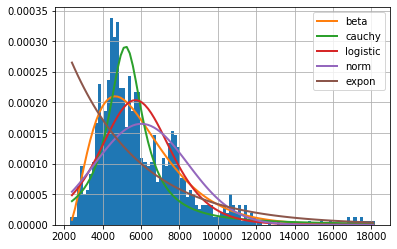

In [ ]:
# Voy a utilizar las distribuciones más comunes.

distribuciones = ['cauchy', 'expon','norm', 'beta', 'logistic']

fitter = Fitter(Elect_df['Consum x Cápita (KWh)'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=5, plot=True,)

Con la biblioteca 'Fitter' quiero identificar la distrubución que mejor se ajusta a los datos reales.

Podemos ver que la distribución que más se ajusta el la Beta, una distribución continua.

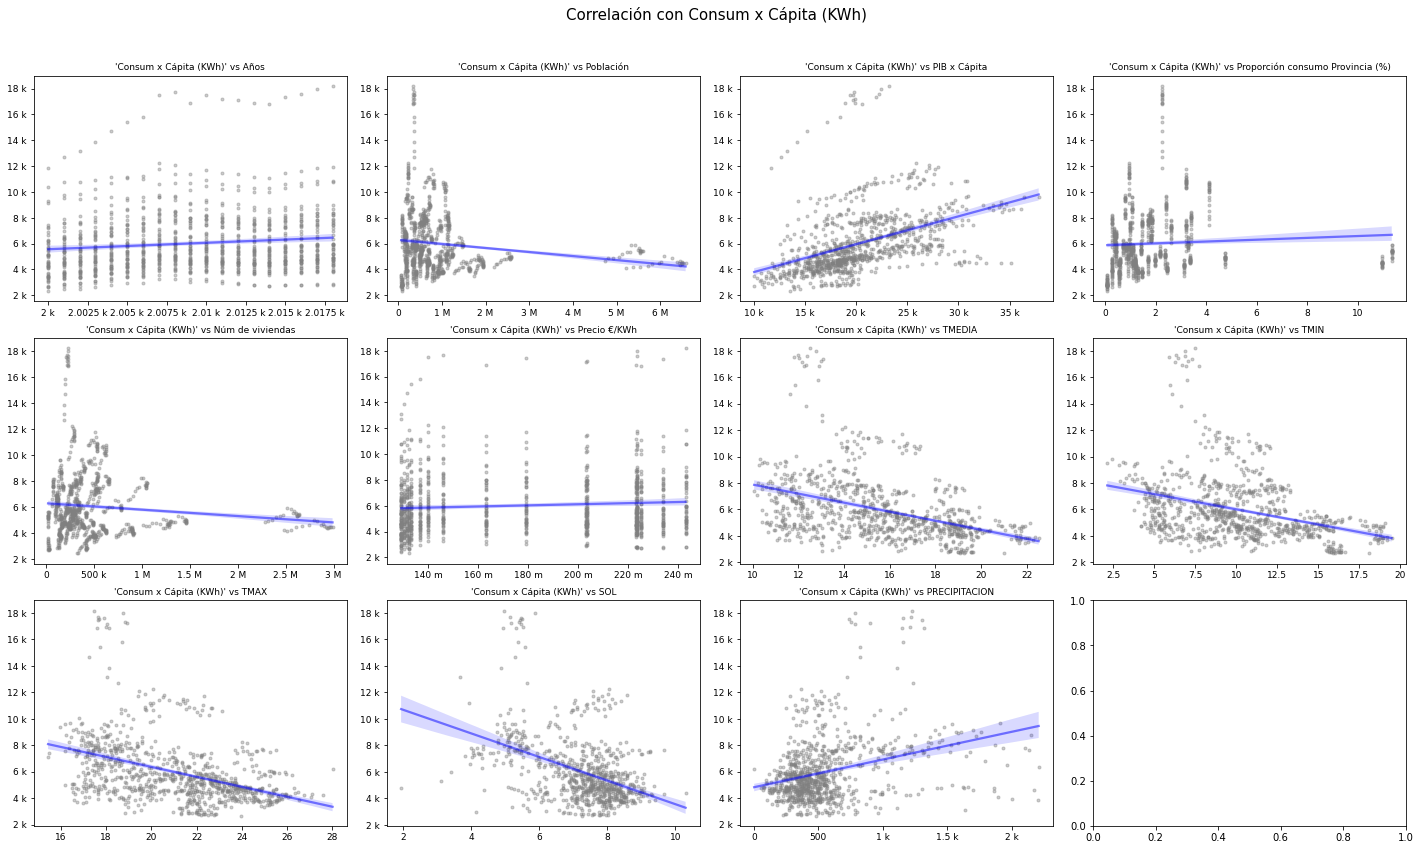

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flat
columnas_numeric = Elect_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Consum x Cápita (KWh)')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = Elect_df[colum],
        y           = Elect_df['Consum x Cápita (KWh)'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"b","alpha":0.5},
        ax          = axes[i])
    axes[i].set_title(f"'Consum x Cápita (KWh)' vs {colum}", fontsize = 9)
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Consum x Cápita (KWh)', fontsize = 15);

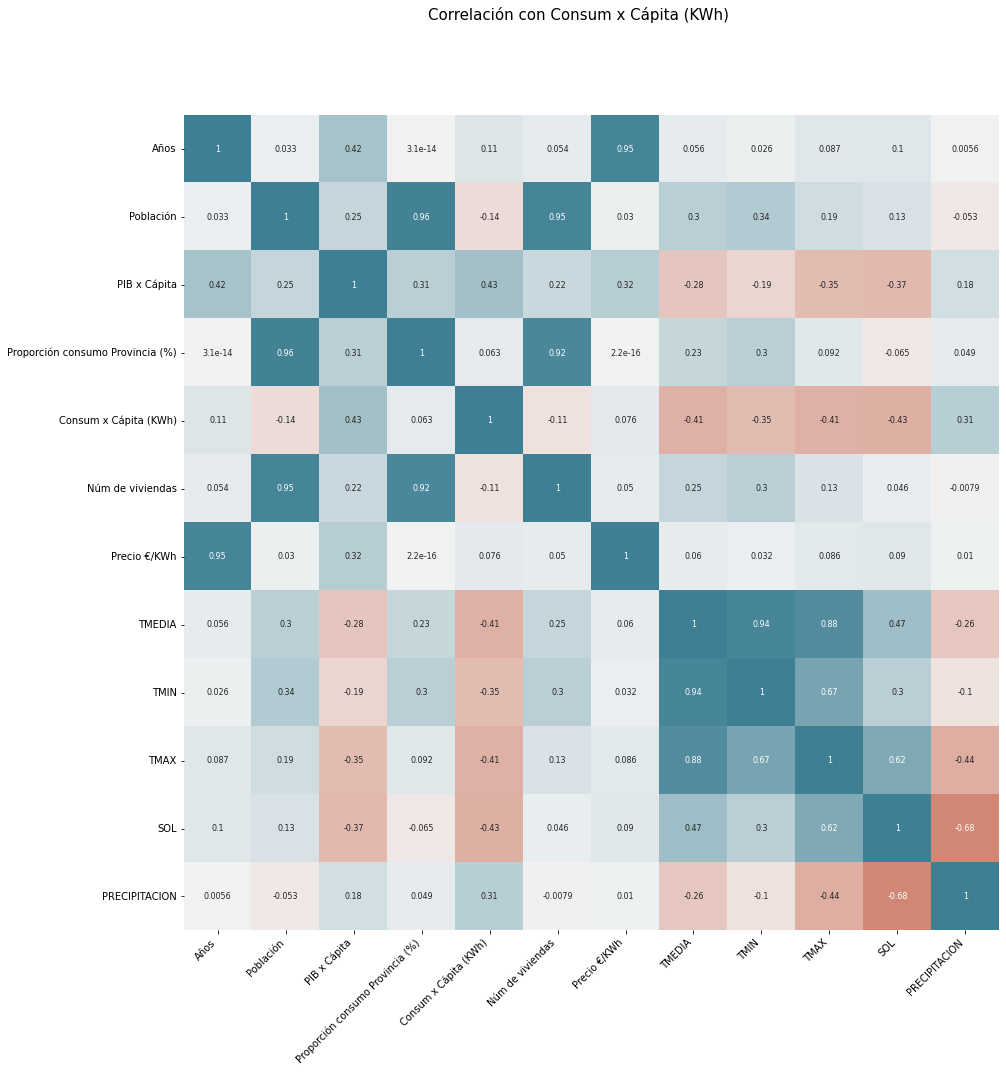

In [ ]:
corr_matrix = Elect_df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',)

ax.tick_params(labelsize = 10)
fig.suptitle('Correlación con Consum x Cápita (KWh)', fontsize = 15);

Con las gráficas anteriores sacamos en claro la baja correlación que existe entre la variable a predecir y el resto de ellas. Las variables con más correlación son el PIB x cápita, y las meteorológicas TMIN, TMEDIA, TMAX Y SOL.
Me ha sorprendido la poca correlación que tiene con el número de viviendas.

# Machine Learning.

#### En el último apartado, procederemos a crear el modelo comparando distintos algoritmos y cogiendo el que mejor se adapte a nuestras necesidades. Tras elegirlo, lo guardaremos.



## Preprocesado.



1.   **Eliminación de valores ausentes:**  He optado por esta opción por el bajo número de valores ausentes. La gran mayoría de valores ausentes se encontraban dentro del grupo climatológico y comprobé que estimar esos valores puede ser más perjudicial para el modelo que eliminarlos. Sé que se pierde información, pero creo que tengo un número alto de registros.

2.   **Transformación de columnas:** Transformación de las columnas numéricas, estandarizando los valores por estar en diferentes escalas. La única columnas categórica, es *'Provincias'* y he decidico no standarizar, ya que al ser 52, se crearían 52 etiquetas. Además, mi intención es que se pueda predecir el consumo per cápita de cualquier región de la cuál tengamos los datos, por lo tanto no tendría mucho sentido.



In [ ]:
# Creamos las etiquetas para saber la provincia a la que pertenece la predicción.

columns = ['Población', 'PIB x Cápita', 'Proporción consumo Provincia (%)', 
           'Núm de viviendas', 'Precio €/KWh', 'TMIN',
          'TMAX', 'TMEDIA', 'SOL','PRECIPITACION']
Etiqueta = Elect_df[Elect_df['Años'] == 2018].drop(columns = columns)
Etiqueta

,Provincias,Años,Consum x Cápita (KWh)
0,Albacete,2018,5878.635033
19,Alicante,2018,4913.245730
38,Almería,2018,4510.874052
57,Álava,2018,8666.673559
76,Asturias,2018,10747.657754
95,Ávila,2018,4919.742836
114,Badajoz,2018,4770.470862
133,Islas Baleares,2018,5168.557757
152,Barcelona,2018,5435.865546
171,Bizkaia,2018,7461.077322


In [ ]:
Elect_df.dropna(axis= 0, inplace= True)
Elect_df.drop(columns= ['Provincias', 'TMEDIA', 'SOL'] , inplace = True)

In [ ]:
Elect_df

,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh,TMIN,TMAX,PRECIPITACION
0,2018,388786,21182.0,0.85,5878.635033,220461.0,0.243000,9.326027,21.495342,425.9
1,2017,390032,20275.0,0.85,5837.647937,219977.0,0.223650,9.332877,23.304384,269.7
2,2016,392118,19122.0,0.85,5737.204107,219393.0,0.223450,9.671038,22.221858,351.5
3,2015,394580,18471.0,0.85,5661.381722,219226.0,0.233950,9.604110,23.006575,313.7
4,2014,396987,17328.0,0.85,5518.115203,218760.0,0.225050,10.182740,22.830685,284.8
...,...,...,...,...,...,...,...,...,...,...
982,2005,65488,18380.0,0.09,3382.489922,25368.0,0.133007,15.378630,21.588493,339.4
983,2004,68016,16615.0,0.09,3112.605857,25074.0,0.131587,15.620765,22.095902,411.8
984,2003,68463,15478.0,0.09,2930.471934,24593.0,0.130401,16.070685,22.648767,653.2
985,2002,69184,14356.0,0.09,2759.202995,23916.0,0.129213,15.682271,22.309972,366.6


In [ ]:
# Quiero crear un dataframe con los valores del 2018 para poder comprobar realmente como funciona el modelo final.
Verificacion_mod = Elect_df[Elect_df['Años'] == 2018]
Verificacion_mod


,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh,TMIN,TMAX,PRECIPITACION
0,2018,388786,21182.0,0.85,5878.635033,220461.0,0.243,9.326027,21.495342,425.9
19,2018,1838819,19861.0,3.36,4913.245730,1300158.0,0.243,13.772055,23.616438,305.2
38,2018,709340,19708.0,1.19,4510.874052,399434.0,0.243,14.802473,23.339835,198.5
57,2018,328868,36133.0,1.06,8666.673559,162005.0,0.243,6.918356,18.007397,821.4
76,2018,1028244,22620.0,4.11,10747.657754,624687.0,0.243,9.532055,18.660548,1171.0
95,2018,158498,20520.0,0.29,4919.742836,166784.0,0.243,6.329315,17.305753,509.4
133,2018,1128908,29026.0,2.17,5168.557757,159440.0,0.243,11.949315,22.979178,451.2
171,2018,1149628,31389.0,3.19,7461.077322,551455.0,0.243,10.751507,19.754247,1323.2
190,2018,357070,29420.0,1.01,7605.647632,258118.0,0.243,5.565479,16.774521,628.8
209,2018,396487,19332.0,0.57,3865.574912,160031.0,0.243,10.830411,21.880000,751.6


In [ ]:
# Quiero eliminar las filas que pertenecen al año 2018.

# Elimino las filas que pertenecen al año 2018 con los índices que he cogido en la anterior celda
Elect_df.drop(list(Elect_df[Elect_df['Años'] == 2018].index), axis = 0, inplace = True)
Elect_df

,Años,Población,PIB x Cápita,Proporción consumo Provincia (%),Consum x Cápita (KWh),Núm de viviendas,Precio €/KWh,TMIN,TMAX,PRECIPITACION
1,2017,390032,20275.0,0.85,5837.647937,219977.0,0.223650,9.332877,23.304384,269.7
2,2016,392118,19122.0,0.85,5737.204107,219393.0,0.223450,9.671038,22.221858,351.5
3,2015,394580,18471.0,0.85,5661.381722,219226.0,0.233950,9.604110,23.006575,313.7
4,2014,396987,17328.0,0.85,5518.115203,218760.0,0.225050,10.182740,22.830685,284.8
5,2013,400007,17438.0,0.85,5537.610592,218320.0,0.223250,8.800822,21.293425,386.0
...,...,...,...,...,...,...,...,...,...,...
982,2005,65488,18380.0,0.09,3382.489922,25368.0,0.133007,15.378630,21.588493,339.4
983,2004,68016,16615.0,0.09,3112.605857,25074.0,0.131587,15.620765,22.095902,411.8
984,2003,68463,15478.0,0.09,2930.471934,24593.0,0.130401,16.070685,22.648767,653.2
985,2002,69184,14356.0,0.09,2759.202995,23916.0,0.129213,15.682271,22.309972,366.6


In [ ]:
# Vamos a dividir el conjunto en train y test. Para ello, vamos a dividir en un 80% el conjunto de test, y un 20% el de validación.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elect_df.drop(['Consum x Cápita (KWh)'], 
                                        axis = 'columns'),
                                        Elect_df['Consum x Cápita (KWh)'],
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True)

Vamos a utilizar una 'pipeline', ya que aplicaremos dos transformaciones:


1.  ***Iterative imputer***, para añadir el valor del número de viviendas faltante en el año 2000. Utilizo este método porque al ser pocos valores, 52, creo que hará que se aproxime más a la realidad. #####------> He eliminado los datos ausentes al principio del apartado.

2.   ***Standar Scaler***, donde normalizo los valores, debido a sus distintas magnitudes, con una normalización estandar.






In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector

Probamos

In [ ]:
Col_numericas = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Transformaciones para las variables numéricas.
Transf_Numericas = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('numeric', Transf_Numericas, Col_numericas)],
                                               remainder='passthrough')


In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Diagrama que vamos a utilizar para procesar las columnas.
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Años', 'Población', 'PIB x Cápita',
                                  'Proporción consumo Provincia (%)',
                                  'Núm de viviendas', 'Precio €/KWh', 'TMIN',
                                  'TMAX', 'PRECIPITACION'])])

In [ ]:
# Tenemos que poner el nombre de las columnas, Ya que el array no las contiene.

Etiquetas = np.concatenate([Col_numericas])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=Etiquetas)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Años                              600 non-null    float64
 1   Población                         600 non-null    float64
 2   PIB x Cápita                      600 non-null    float64
 3   Proporción consumo Provincia (%)  600 non-null    float64
 4   Núm de viviendas                  600 non-null    float64
 5   Precio €/KWh                      600 non-null    float64
 6   TMIN                              600 non-null    float64
 7   TMAX                              600 non-null    float64
 8   PRECIPITACION                     600 non-null    float64
dtypes: float64(9)
memory usage: 42.3 KB


## Algoritmos.

### 1. Regresión Lineal

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import multiprocessing
from sklearn.metrics import mean_squared_error

# Pipe
# Cogemos las columnas numéricas
Col_numericas = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Las transformamos
Transf_Numericas = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('numeric', Transf_Numericas, Col_numericas)],
                    remainder=PolynomialFeatures(degree=2))


pipe = Pipeline([('preprocessing', preprocessor),('modelo', Ridge())])

# Optimización de hiperparámetros
# Hacemos la búsqueda
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 30,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 42,
        return_train_score = True)

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)').drop(columns = 'params').sort_values('mean_test_score', ascending = False).head(3)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
27,0.169222,-1369.958197,195.886319,-1327.857020,49.947796
11,0.077228,-1370.266376,194.609587,-1327.816638,49.945848
3,0.012771,-1370.501846,193.707453,-1327.806190,49.945345


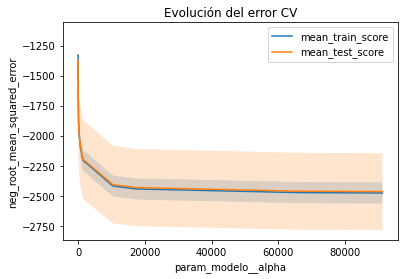

In [ ]:
# Gráfico resultados validación cruzada

fig, ax = plt.subplots(figsize=(6, 4))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [ ]:
from sklearn.metrics import mean_squared_error

# Error de test del modelo
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 1351.1578682037282


### 2. KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

# Pipeline
# Cogemos las columnas numéricas
Col_numericas = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Las transformamos
Transf_Numericas = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('numeric', Transf_Numericas, Col_numericas)],
                    remainder= PolynomialFeatures(degree=2))

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# Hacemos la búsqueda
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 30,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 42,
        return_train_score = True)

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)').drop(columns = 'params').sort_values('mean_test_score', ascending = False).head(3)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
10,2,-1055.589947,204.202099,-580.143478,43.145431
17,6,-1282.719986,261.225146,-1021.230706,37.402465
8,14,-1668.078882,310.536165,-1528.676595,45.460805


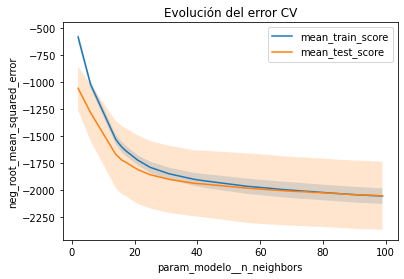

In [ ]:
# Gráfico resultados validación cruzada para cada hiperparámetro
fig, ax = plt.subplots(figsize=(6, 4))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);


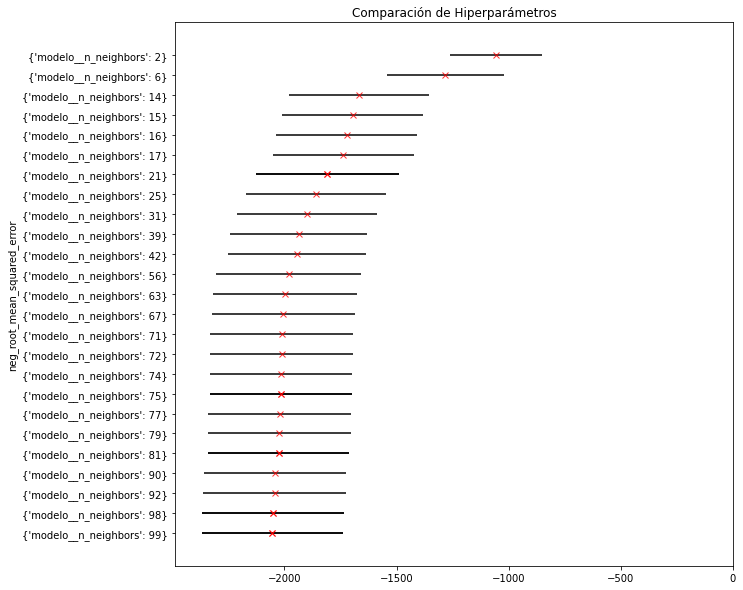

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

resultados = resultados.sort_values('mean_test_score', ascending = True)

ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0)

ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="x",
    linestyle="",
    alpha=0.8,
    color="r")

ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica);

In [ ]:
# Error de test del modelo final
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)

print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 1002.5363281127985


### 3. Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipe
# Cogemos las columnas numéricas
Col_numericas = X_train.select_dtypes(include = ['float64', 'int']).columns.to_list()

# Las transformamos
Transf_Numericas = Pipeline(steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers= [('numeric', Transf_Numericas, Col_numericas)],
                    remainder = PolynomialFeatures(degree = 2))

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# Hacemos la búsqueda

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
    }

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 30,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 42,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)').drop(columns = 'params').sort_values('mean_test_score', ascending = False).head(3)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
17,100,7,10,-622.826998,129.978386,-256.769944,21.025726
6,1000,5,None,-627.533035,135.335795,-237.786485,10.141777
25,1000,7,10,-633.193716,150.981943,-246.825622,15.701586


In [ ]:
# Error de test del modelo final
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 538.2164204853412


### 4. Gradient Boosting Trees

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# Pipe
# Cogemos las columnas numéricas
Col_numericas = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Las transformamos
Transf_Numericas = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers = [('numeric', Transf_Numericas, Col_numericas)], 
                                 remainder = PolynomialFeatures(degree = 2))

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

# Optimización de hiperparámetros
# Hacemos la búsqueda
param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 30,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 42,
        return_train_score = True)

grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)').drop(columns = 'params').sort_values('mean_test_score', ascending = False).head(3)

,param_modelo__subsample,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
2,0.5,2000,7,3,-395.489391,60.042804,-1.925313,0.177033
4,1,1000,auto,5,-443.807714,133.293037,-0.047427,0.010246
20,0.7,1000,5,5,-450.768963,83.501311,-0.042416,0.007278


In [ ]:
# Error de test del modelo final
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_gbt = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_gbt}")

El error (rmse) de test es: 291.062445758194


### 5. Stacking

#### 5.1 Ridge + Random Forest

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# Pipe
# Selección de columnas numéricas
Col_numericas = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Transformaciones para las variables numéricas
Transf_Numericas = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('numeric', Transf_Numericas, Col_numericas)],
                    remainder = PolynomialFeatures(degree = 2))

# Se combinan los pasos de preprocesado y los modelos creando varios pipeline.
# Creación de la Pipe de Ridge.     
pipe_ridge = Pipeline([('preprocessing', preprocessor),
                     ('ridge', Ridge(alpha=3.1))])
# Creación de la Pipe de RF.
pipe_rf = Pipeline([('preprocessing', preprocessor),
                     ('random_forest', RandomForestRegressor(n_estimators = 1000,
                                                             max_features = 5,
                                                             max_depth    = None))])

In [ ]:
# Definición y entrenamiento del StackingRegressor
estimators = [('ridge', pipe_ridge),
              ('random_forest', pipe_rf)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RandomForestRegressor(n_estimators=10,
                                                                             random_state=42))
# Se asigna el resultado a _ para que no se imprima por pantalla
Resultado = stacking_regressor.fit(X = X_train, y = y_train)

In [ ]:
# Error de test del stacking
modelo_final = stacking_regressor
predicciones = modelo_final.predict(X = X_test)
rmse_stacking_1 = mean_squared_error(
                    y_true  = y_test,
                    y_pred  = predicciones,
                    squared = False)
print(f"El error (rmse) de test es: {rmse_stacking_1}")

El error (rmse) de test es: 425.14009945308743


#### 5.2 Random Forest + Gradient Boosting Trees

In [ ]:
# Pipe
# Selección de columnas numéricas
Col_numericas = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Transformaciones para las variables numéricas
Transf_Numericas = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('numeric', Transf_Numericas, Col_numericas)],
                    remainder = PolynomialFeatures(degree = 2))
# Creación de la Pipe de RF
pipe_rf = Pipeline([('preprocessing', preprocessor),
                     ('random_forest', RandomForestRegressor(n_estimators = 1000,
                                                             max_features = 5,
                                                              max_depth    = None))])

# Creación de la Pipe de GBR
pipe_GBR = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

In [ ]:

# Definición y entrenamiento del StackingRegressor
estimators = [('random_forest', pipe_rf),
              ('GBR', pipe_GBR)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())
# Se asigna el resultado a _ para que no se imprima por pantalla
Resultado = stacking_regressor.fit(X = X_train, y = y_train)

In [ ]:
# Error de test del stacking
modelo_final = stacking_regressor
predicciones = modelo_final.predict(X = X_test)
rmse_stacking_2 = mean_squared_error(
                    y_true  = y_test,
                    y_pred  = predicciones,
                    squared = False)
print(f"El error (rmse) de test es: {rmse_stacking_2}")

El error (rmse) de test es: 391.8320256583746


### 6. Comparación de modelos.



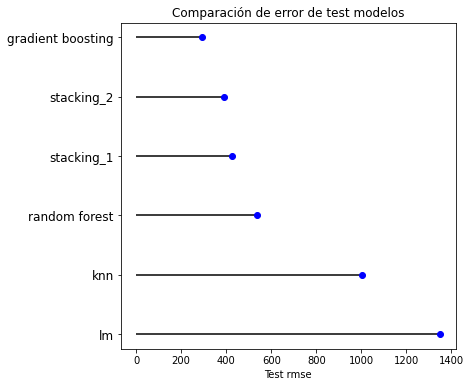

In [ ]:
error_modelos = pd.DataFrame({'modelo': ['knn', 'lm', 'random forest', 'gradient boosting','stacking_1', 'stacking_2'],
                              'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbt, rmse_stacking_1, rmse_stacking_2]})

error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 6))
ax.hlines(error_modelos['modelo'], xmin=0, xmax=error_modelos['rmse'])
ax.plot(error_modelos['rmse'], error_modelos['modelo'], "o", color='blue')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

Según la comparación de los modelos, el más favorable sería el *Gradient Boosting*, además este agoritmo suele dar buenos resultados con datos tabulares.

### 7. Optimización del modelo seleccionado:

***Gradient Boosting Trees***




In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search

# Hiperparámetros a evaluar
param_grid = {'max_features'  : ['auto', 3, 5, 7],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(estimator  = GradientBoostingRegressor(
                        n_estimators        = 1000, 
                        random_state        = 42,                        
                        # Parada temprana
                        validation_fraction = 0.1,
                        n_iter_no_change    = 5,
                        tol                 = 0.0001),
                        param_grid = param_grid,
                        scoring    = 'neg_root_mean_squared_error',
                        n_jobs     = multiprocessing.cpu_count() - 1,
                        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=42), 
                        refit      = True, #--> Para reentrenar el modelo de manera automática, una vez que haya encontrado los mejores parámetros
                       verbose    = 0,
                      return_train_score = True)

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)').drop(columns = 'params').sort_values('mean_test_score', ascending = False).head(3)

,param_learning_rate,param_max_depth,param_max_features,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
113,0.1,3,auto,1,-453.971067,27.452886,-192.802494,27.390397
119,0.1,3,7,1,-508.655202,26.669811,-217.051096,34.867747
64,0.01,3,auto,0.5,-514.867148,57.522227,-273.465427,18.264964


In [ ]:
# Mejores Hiperparámetros
print("Mejores hiperparámetros encontrados (cv)")
print("########################################")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
########################################
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'auto', 'subsample': 1} : -453.9710669827778 neg_root_mean_squared_error


In [ ]:
# Número de árboles del modelo final (Parada Temprana)
print(f"Número de árboles del modelo: {grid.best_estimator_.n_estimators_}")

Número de árboles del modelo: 207


In [ ]:
# Error de validación del modelo final
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False)
print(f"El error (rmse) de test del modelo final es: {rmse}")

El error (rmse) de test del modelo final es: 391.9336701965893


## Guardamos el modelo seleccionado. 

In [ ]:
import joblib

joblib.dump(modelo_final, "Consumo_Modelo.pkl") 

['Consumo_Modelo.pkl']

## Cargamos el modelo y predecimos la información almacenada en Verificacion_mod

In [ ]:
Verificacion_mod.drop(columns= 'Consum x Cápita (KWh)', inplace = True)
Prediccion = modelo_final.predict(Verificacion_mod)
Verificacion_mod['Predicción (KWh)'] = list(Prediccion)

In [ ]:
Tableau_df = Verificacion_mod.merge(Etiqueta, how= 'inner', left_index=True, right_index=True)
Tableau_df

,Años_x,Población,PIB x Cápita,Proporción consumo Provincia (%),Núm de viviendas,Precio €/KWh,TMIN,TMAX,PRECIPITACION,Predicción (KWh),Provincias,Años_y,Consum x Cápita (KWh)
0,2018,388786,21182.0,0.85,220461.0,0.243,9.326027,21.495342,425.9,6794.168627,Albacete,2018,5878.635033
19,2018,1838819,19861.0,3.36,1300158.0,0.243,13.772055,23.616438,305.2,4848.616591,Alicante,2018,4913.245730
38,2018,709340,19708.0,1.19,399434.0,0.243,14.802473,23.339835,198.5,4931.865283,Almería,2018,4510.874052
57,2018,328868,36133.0,1.06,162005.0,0.243,6.918356,18.007397,821.4,9250.563057,Álava,2018,8666.673559
76,2018,1028244,22620.0,4.11,624687.0,0.243,9.532055,18.660548,1171.0,9940.916236,Asturias,2018,10747.657754
95,2018,158498,20520.0,0.29,166784.0,0.243,6.329315,17.305753,509.4,6460.667725,Ávila,2018,4919.742836
133,2018,1128908,29026.0,2.17,159440.0,0.243,11.949315,22.979178,451.2,5486.987009,Islas Baleares,2018,5168.557757
171,2018,1149628,31389.0,3.19,551455.0,0.243,10.751507,19.754247,1323.2,7301.730406,Bizkaia,2018,7461.077322
190,2018,357070,29420.0,1.01,258118.0,0.243,5.565479,16.774521,628.8,8181.328747,Burgos,2018,7605.647632
209,2018,396487,19332.0,0.57,160031.0,0.243,10.830411,21.880000,751.6,4268.653668,Cáceres,2018,3865.574912


In [ ]:
rmse_2018 = mean_squared_error(
        y_true  = Tableau_df['Predicción (KWh)'],
        y_pred  = Tableau_df['Consum x Cápita (KWh)'],
        squared = False)
print(f"El error (rmse) de test del modelo final es: {rmse_2018}")

El error (rmse) de test del modelo final es: 506.50167754739425


In [ ]:
#Tableau_df.to_excel('Tableau_df.xls') 
#files.download('Tableau_df.xls')

# Información de la sesión

In [ ]:
#!pip install sinfo

     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=974ccf94e3fb162a982d7667358e31b541801fb4750d2fec138796b19ebbaa7b
  Stored in directory: /root/.cache/pip/wheels/68/ca/56/344d532fe53e855ccd6549795d370588ab8123907eecf4cf30
Successfully built sinfo


In [ ]:
#from sinfo import sinfo
#sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
fitter      1.4.0
google      NA
joblib      1.1.0
matplotlib  3.2.2
numpy       1.19.5
pandas      1.3.5
plotly      5.5.0
seaborn     0.11.2
sinfo       0.3.4
sklearn     1.0.2
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.9.1
notebook            5.3.1
-----
Python 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
2 logical CPU cores, x86_64
-----
Session information updated at 2022-02-09 12:24
